In [26]:
# Relationship Between Stock Volume and Share Price Movement.

# Objectives:
# 1. Data Collection: Gather historical stock price and volume data.
# 2. Data Preprocessing: Clean and preprocess the data for analysis.
# 3. Exploratory Data Analysis (EDA): Visualize and understand the data.
# 4. Correlation Analysis: Assess the correlation between trading volume and share price movements.
# 5. Statistical Analysis: Conduct statistical tests to determine the significance of the observed relationships.
# 6. Predictive Modeling: Build models to predict price movements based on trading volume.
# 7. Conclusion and Insights: Summarize findings and provide insights.

In [ ]:
pip install yfinance; pandas; matplotlib; seaborn; scikit-learn; scipy


In [ ]:
# 1. Data Collection
import pandas as pd
import yfinance as yf

# define stock tickers and period of interest.
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2018-01-01'
end_date = '2023-12-31'

# download historical data
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start = start_date, end = end_date)

# combine data into a single DataFrame
combined_data = pd.concat(stock_data, axis = 1)
combined_data.to_csv('stock_data.csv')

In [29]:
# 2. Data Processing 
# load the data
data = pd.read_csv('stock_data.csv', header = [0, 1], index_col= 0)

# handle missing values
# 'fillna' function of a DataFrame is deprecated and will be removed in future versions of pandas. Original code: data = data.fillna(method= 'ffill').dropna()
data = data.ffill().dropna()

# calculate additional features
for ticker in tickers:
    data[(ticker, 'Daily Return')] = data[(ticker, 'Close')].pct_change()
    data[(ticker, 'Volume Change')] = data[(ticker, 'Volume')].pct_change()
    data[(ticker, '5-day MA')] = data[(ticker, 'Close')].rolling(window=5).mean()
    data[(ticker, 'Volatility')] = data[(ticker, 'Close')].rolling(window=5).std()

# save the preprocessed data
data.to_csv('preprocessed_stock_data.csv')

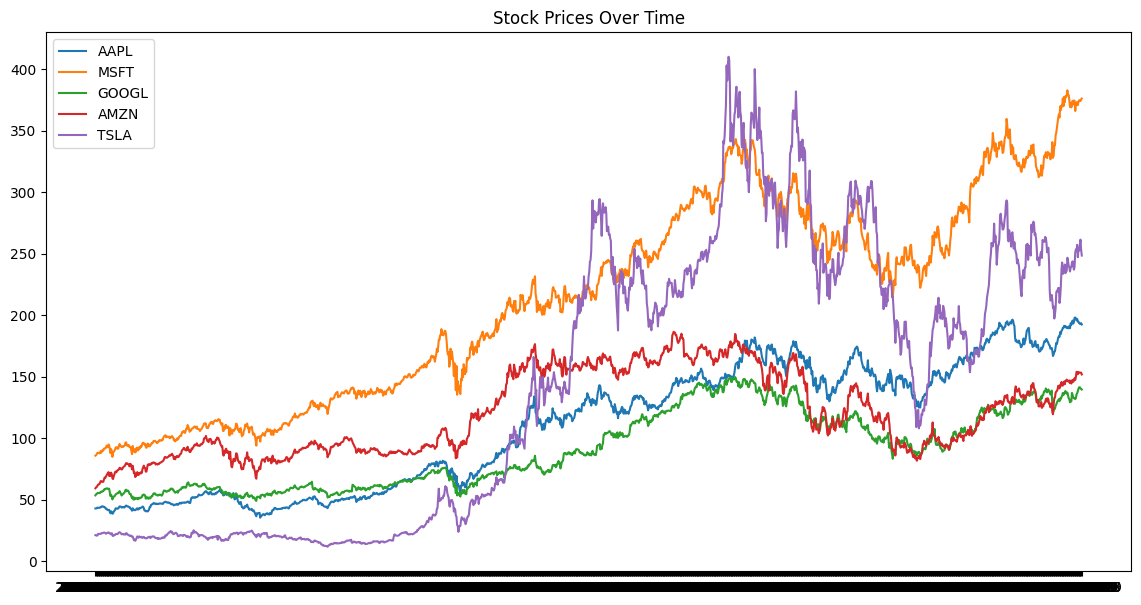

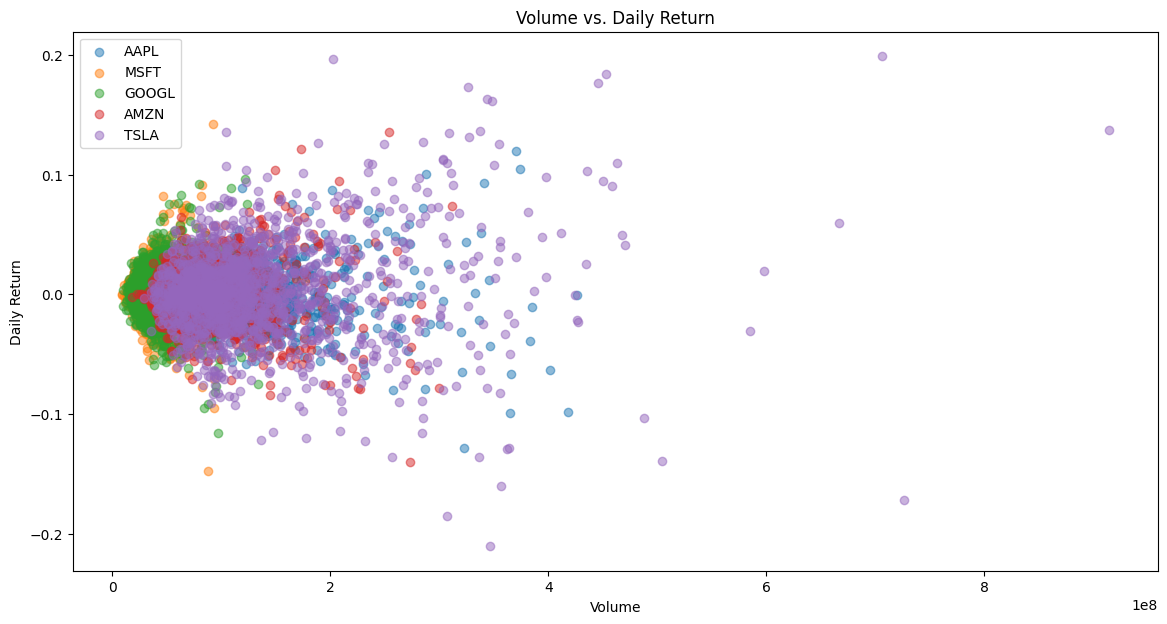

In [30]:
# 3. Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# load the preprocessed data
data = pd.read_csv('preprocessed_stock_data.csv', header=[0, 1], index_col=0)

# descriptive statistics
descriptive_stats = data.describe()

# time series plot
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data.index, data[(ticker, 'Close')], label=ticker)
plt.legend()
plt.title('Stock Prices Over Time')
plt.show()

# scatter plot: Volume vs. price change
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.scatter(data[(ticker, 'Volume')], data[(ticker, 'Daily Return')], alpha=0.5, label=ticker)
plt.legend()
plt.xlabel('Volume')
plt.ylabel('Daily Return')
plt.title('Volume vs. Daily Return')
plt.show()

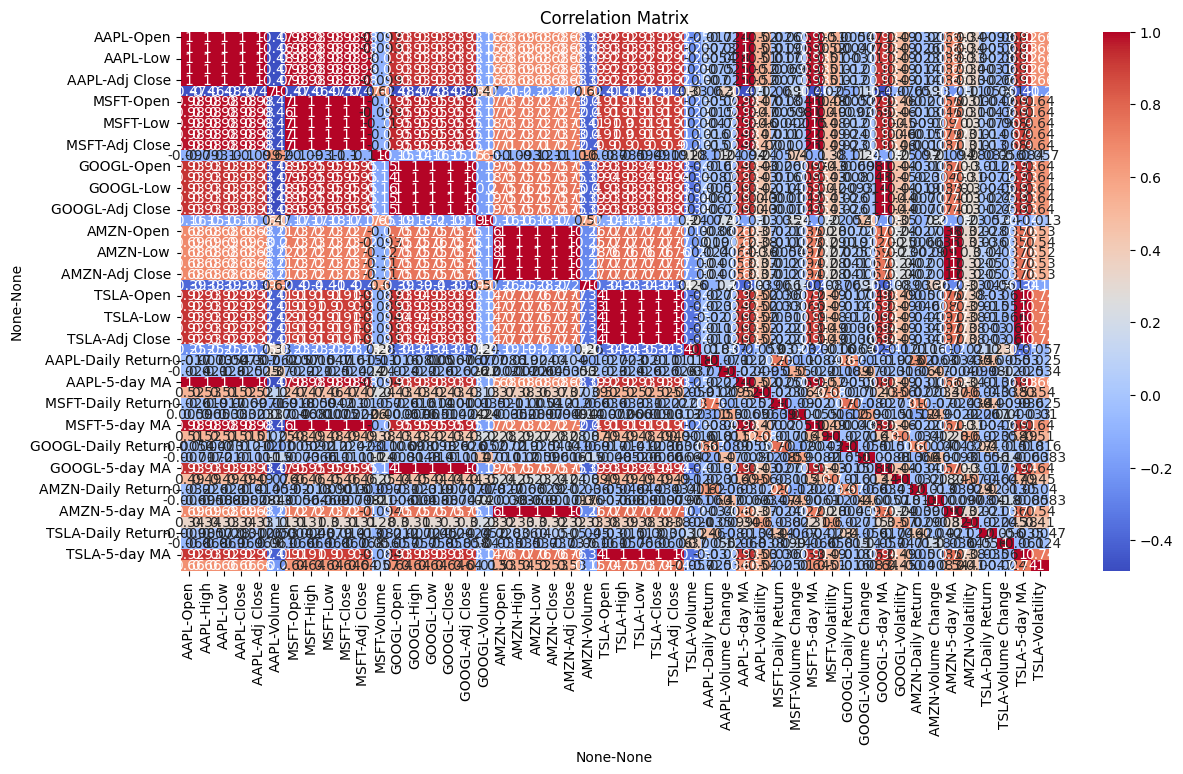

In [31]:
# 4. Correlation Analysis

# Calculate correlation
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# 5. Statistical Analysis

from scipy.stats import ttest_ind

# High Volume Days Analysis
high_volume_threshold = data[(ticker, 'Volume')].quantile(0.95)

high_volume_days = data[data[(ticker, 'Volume')] > high_volume_threshold]
normal_volume_days = data[data[(ticker, 'Volume')] <= high_volume_threshold]

# T-test
t_stat, p_val = ttest_ind(high_volume_days[(ticker, 'Daily Return')], normal_volume_days[(ticker, 'Daily Return')])
print(f"T-statistic: {t_stat}, P-value: {p_val}")


In [ ]:
# 6. Predictive Modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for modeling
X = data[(ticker, 'Volume')].values.reshape(-1, 1)
y = data[(ticker, 'Daily Return')].values

# Remove rows with NaN values in y
mask = ~pd.isna(y)
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Correctly use mean_squared_error to get RMSE

print(f"MAE: {mae}, RMSE: {rmse}")




In [ ]:
# Next Steps:
# 1. Model refinement
# 2. Explore advanced models
# 3. 